In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from utils import get_player_data, plot_decision_regions

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

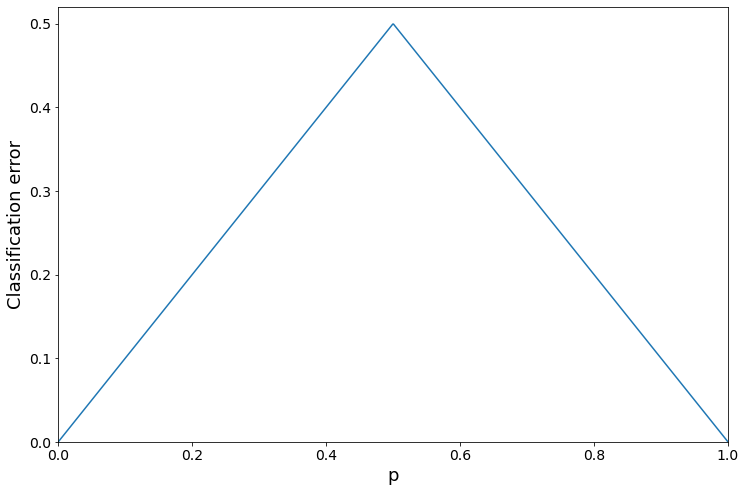

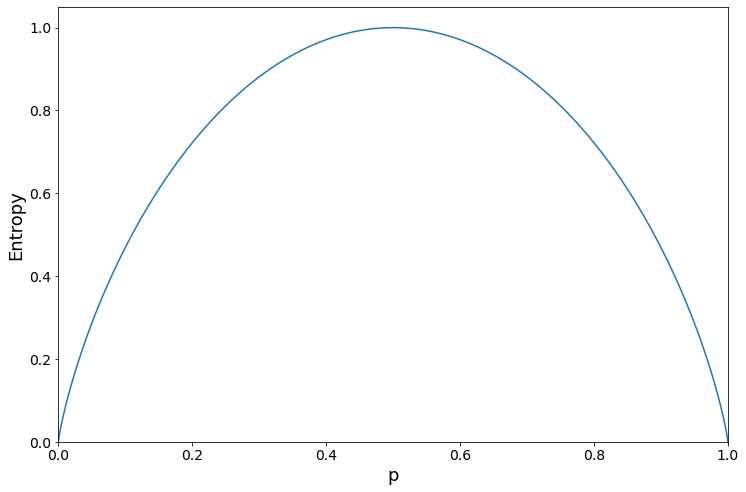

In [2]:
"""Plot the losses of classification error and entropy"""
# Classification error
x = np.linspace(0, 1, 1000)
y = 1 - np.stack([x, 1 - x]).max(axis=0)
plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.xlabel('p', size=18)
plt.ylabel('Classification error', size=18)
plt.xlim([0, 1])
plt.ylim([0, 0.52])
plt.savefig('ML_images/classification_error')
plt.show()

# Entropy
eps = 1e-5 # Avoid log0
x = np.linspace(eps, 1-eps, 1000)
y = -1 * (x * np.log2(x) + (1 - x) * np.log2(1 - x))
plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.xlabel('p', size=18)
plt.ylabel('Entropy', size=18)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.savefig('ML_images/entropy')
plt.show()

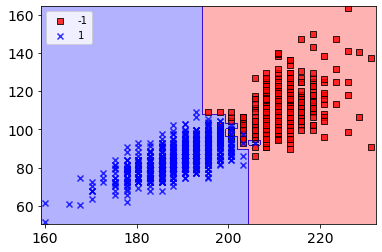

In [3]:
"""Player position prediction by fully-grown decision trees"""
X_player, y_player = get_player_data(normalized=False)

tree = DecisionTreeClassifier(criterion='entropy', random_state=1)
tree.fit(X_player, y_player)
plot_decision_regions(X_player, y_player, classifier=tree)
plt.legend(loc='upper left')
plt.savefig('ML_images/player_dt')
plt.show()

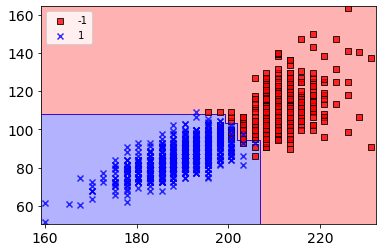

array([0.94667332, 0.05332668])

In [4]:
"""Player position prediction by regularized decision trees"""
tree = DecisionTreeClassifier(criterion='entropy', random_state=1, min_samples_split=10, max_depth=4, max_leaf_nodes=20)
tree.fit(X_player, y_player)
plot_decision_regions(X_player, y_player, classifier=tree)
plt.legend(loc='upper left')
plt.savefig('ML_images/player_dt_regularized')
plt.show()

tree.feature_importances_